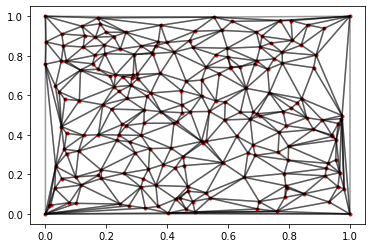

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec


V = np.genfromtxt("Meshdata/RandomVertices.txt")
T = np.genfromtxt("Meshdata/Faces.txt")

n_v = int(V.size/2)
n_t = int(T.size/3)

for i in range(0, n_t , 1):
        for j in range( 0, 3 , 1):
                k = int(T[i][j])
                l = int(T[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='r', marker='.')
plt.show()


Sol = np.genfromtxt("Solutions/SolFor1.000000")
Err = np.genfromtxt("Solutions/ErrorFor1.000000")
V1 = V

Sol2 = np.genfromtxt("Solutions/SolFor2.000000")
Err2 = np.genfromtxt("Solutions/ErrorFor2.000000")
V2 = V

Sol3 = np.genfromtxt("Solutions/SolFor3.000000")
Err3 = np.genfromtxt("Solutions/ErrorFor3.000000")
V3 = V

In [2]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,101)
    yi = np.linspace(0.,1.,101)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet,alpha=0.5)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(V2[::,:1:],V2[::,1::],marker='o',c='b',s=10)
    for i in range(0, len(Triangulation) , 1):
        for j in range( 0, 3 , 1):
                k = int(Triangulation[i][j])
                l = int(Triangulation[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)

def DeleteFromMultArrays( mArr , arr, errors , tolerance):
    i = 0
    while i < len(arr):
        if (errors[i]>tolerance):
            mArr = np.delete(mArr,i,0)
            arr = np.delete(arr,i)
            errors = np.delete(errors,i)
        else:
            i += 1
    NewData = (mArr, arr, errors)
    return NewData


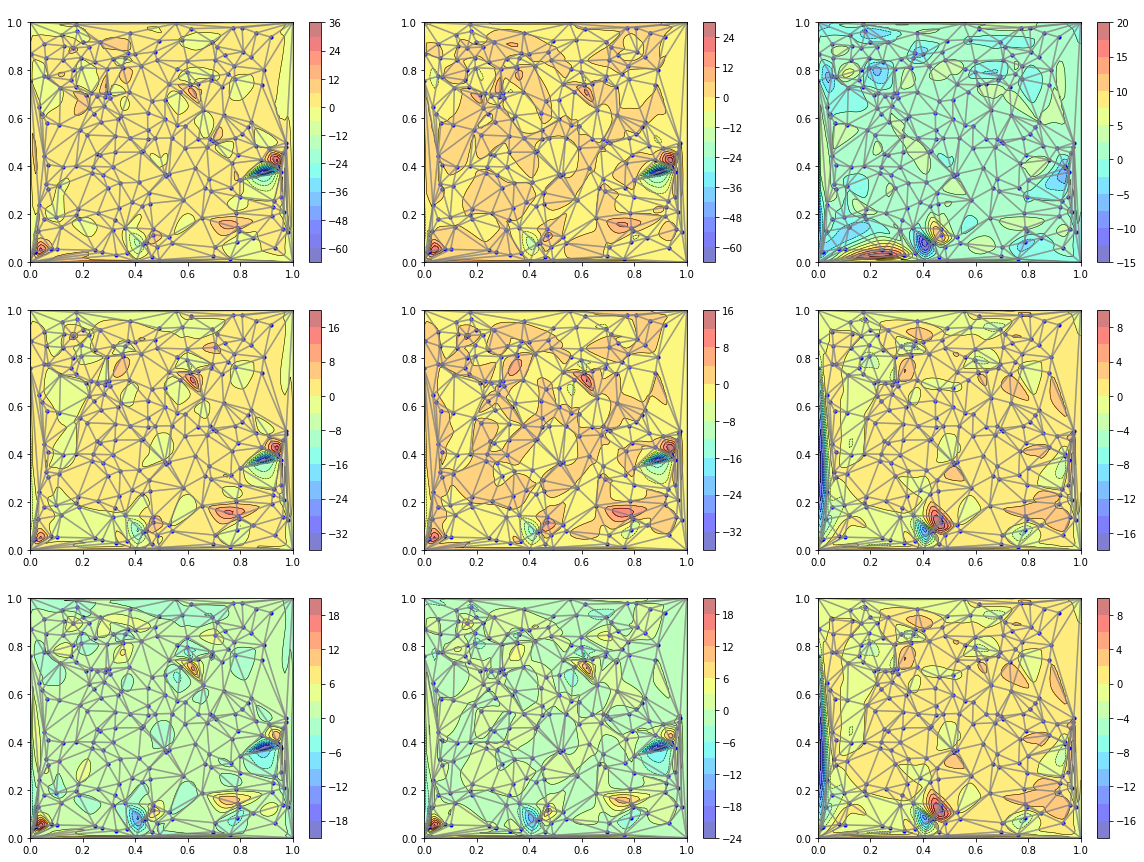

In [3]:
plt.figure(figsize=(20,15))

plt.subplot(331)
InterpolationPlot( V1, Sol, " ", T)

plt.subplot(334)
InterpolationPlot( V2, Sol2, " ", T)

plt.subplot(337)
InterpolationPlot( V3, Sol3, " ", T)


plt.subplot(332)
InterpolationPlot( V1, Err, " ", T)

plt.subplot(335)
InterpolationPlot( V2, Err2, " ", T)

plt.subplot(338)
InterpolationPlot( V3, Err3, " ", T)


Data1 = DeleteFromMultArrays( V1 , Sol , Err , 0.5)
Data2 = DeleteFromMultArrays( V2 , Sol2 , Err2 , 0.5)
Data3 = DeleteFromMultArrays( V3 , Sol3 , Err3 , 0.5)

plt.subplot(333)
InterpolationPlot(Data1[0] , Data1[1], " ", T)

plt.subplot(336)
InterpolationPlot(Data2[0] , Data2[1], " ", T)

plt.subplot(339)
InterpolationPlot(Data2[0] , Data2[1], " ", T)

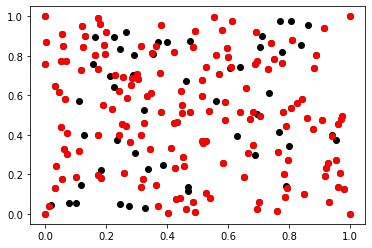

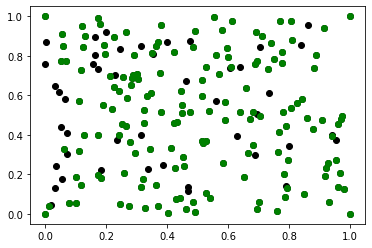

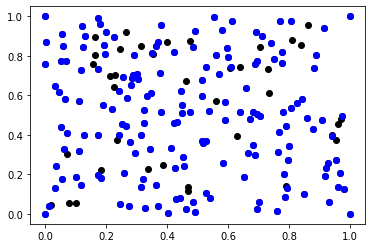

In [6]:
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data1[0]),1):
    plt.scatter(Data1[0][i][0],Data1[0][i][1], color='r', marker='o')
plt.show()
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data2[0]),1):
    plt.scatter(Data2[0][i][0],Data2[0][i][1], color='g', marker='o')
plt.show()
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data3[0]),1):
    plt.scatter(Data3[0][i][0],Data3[0][i][1], color='b', marker='o')
plt.show()